In [1]:
import numpy as np
import pandas as pd
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv('hospitaliere_new.csv',sep=';')
df = df.groupby('jour')['incid_hosp'].sum().reset_index().rename(columns={'jour':'jour','hosp' : 'hosp'})
df['jour'] = pd.to_datetime(df['jour'])
df

,jour,incid_hosp
0,2020-03-19,2229
1,2020-03-20,1256
2,2020-03-21,1540
3,2020-03-22,1534
4,2020-03-23,2053
5,2020-03-24,2618
6,2020-03-25,3166
7,2020-03-26,3096
8,2020-03-27,3058
9,2020-03-28,3352


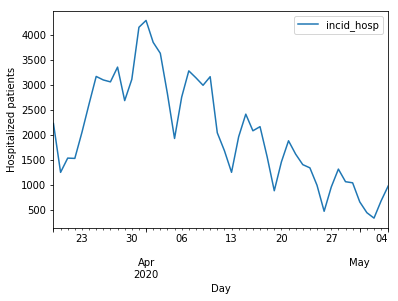

In [41]:
df.plot(x="jour",y="incid_hosp")
plt.xlabel('Day')
plt.ylabel('Hospitalized patients')
plt.show()

In [2]:
class SIRModel():
    
    def __init__(self, beta_init=0.2,gamma_init=1./10):
        self.beta_0 = beta_init
        self.gamma_0 = gamma_init
        self.beta_ = None
        self.gamma_ = None

    def fit(self,x,y):
        return self

    def predict(self,t):
        return S, I, R

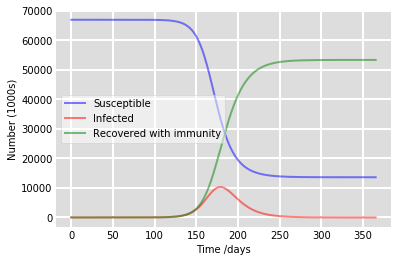

In [43]:
# Total population in France, N.
N = 67e6
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.2, 1./10 
# A grid of time points (in days)
t = np.linspace(0,365,365)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)

plt.show()